In [20]:
import pandas as pd
full_dataset = pd.read_csv('Environmental Sound Classification 50/esc50.csv',delimiter=',')

In [21]:
full_dataset.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [22]:
import os
paths = []
labels = []
for dirname, _, filenames in os.walk('Environmental Sound Classification 50/'):
    print(dirname, filenames)
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('-')[-1]
        label = label.split('.')[0]
        labels.append(label)
print('Dataset is Loaded')

Environmental Sound Classification 50/ ['bc_utils.py', 'esc50.csv', 'utils.py', 'utils2.py']
Environmental Sound Classification 50/audio []
Environmental Sound Classification 50/audio\audio ['1-100032-A-0.wav', '1-100038-A-14.wav', '1-100210-A-36.wav', '1-100210-B-36.wav', '1-101296-A-19.wav', '1-101296-B-19.wav', '1-101336-A-30.wav', '1-101404-A-34.wav', '1-103298-A-9.wav', '1-103995-A-30.wav', '1-103999-A-30.wav', '1-104089-A-22.wav', '1-104089-B-22.wav', '1-105224-A-22.wav', '1-110389-A-0.wav', '1-110537-A-22.wav', '1-115521-A-19.wav', '1-115545-A-48.wav', '1-115545-B-48.wav', '1-115545-C-48.wav', '1-115546-A-48.wav', '1-115920-A-22.wav', '1-115920-B-22.wav', '1-115921-A-22.wav', '1-116765-A-41.wav', '1-11687-A-47.wav', '1-118206-A-31.wav', '1-118559-A-17.wav', '1-119125-A-45.wav', '1-121951-A-8.wav', '1-12653-A-15.wav', '1-12654-A-15.wav', '1-12654-B-15.wav', '1-13571-A-46.wav', '1-13572-A-46.wav', '1-13613-A-37.wav', '1-137-A-32.wav', '1-137296-A-16.wav', '1-14262-A-37.wav', '1-15

In [23]:
labels[:4]

['bc_utils', 'esc50', 'utils', 'utils2']

In [24]:
len(paths)
paths = paths[4:2004]


In [25]:
labels = labels[4:2004]
labels1=[]
print(labels[0:7])
for i in labels:
    if (i == '0' or i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6' or i == '7' or i == '8' or i == '9'):
        labels1.append("Animals")
    elif (i == '10' or i == '11' or i == '12' or i == '13' or i == '14' or i == '15' or i == '16' or i == '17' or i == '18' or i == '19'):
        labels1.append("NaturalSoundScapes")
    elif (i == '20' or i == '21' or i == '22' or i == '23' or i == '24' or i == '25' or i == '26' or i == '27' or i == '28' or i == '29'):
        labels1.append("HumanSounds")
    elif (i == '30' or i == '31' or i == '32' or i== '33' or i == '34' or i == '35' or i == '36' or i == '37' or i == '38' or i == '39'):
        labels1.append("InteriorSounds")
    else:
        labels1.append("ExteriorSounds")
print(len(labels))
print(labels1[0:8])

['0', '14', '36', '36', '19', '19', '30']
2000
['Animals', 'NaturalSoundScapes', 'InteriorSounds', 'InteriorSounds', 'NaturalSoundScapes', 'NaturalSoundScapes', 'InteriorSounds', 'InteriorSounds']


In [26]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels1
df.head()

,speech,label
0,Environmental Sound Classification 50/audio\au...,Animals
1,Environmental Sound Classification 50/audio\au...,NaturalSoundScapes
2,Environmental Sound Classification 50/audio\au...,InteriorSounds
3,Environmental Sound Classification 50/audio\au...,InteriorSounds
4,Environmental Sound Classification 50/audio\au...,NaturalSoundScapes


In [27]:
df['label'].value_counts()


label
Animals               400
NaturalSoundScapes    400
InteriorSounds        400
HumanSounds           400
ExteriorSounds        400
Name: count, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import librosa
from librosa import display

def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

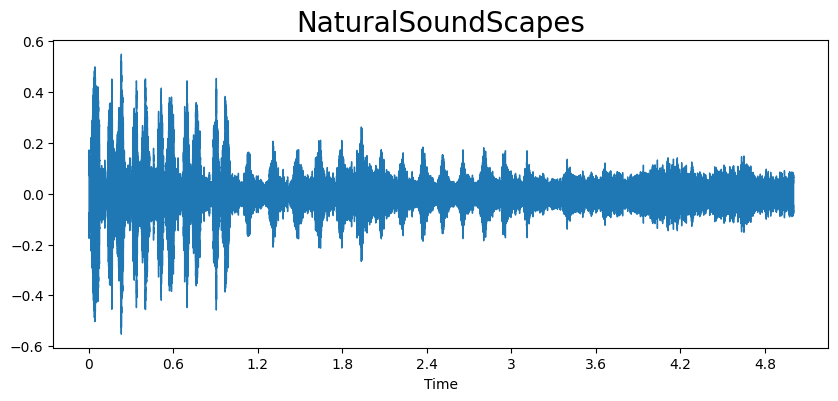

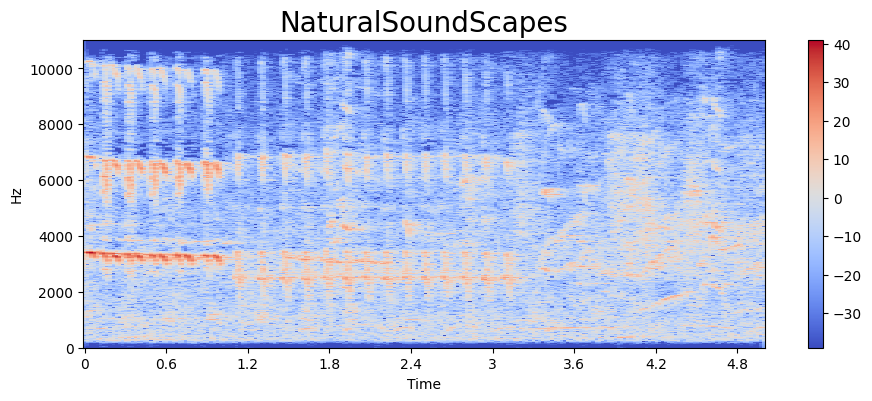

In [29]:
import numpy as np
from IPython.display import Audio
emotion = 'NaturalSoundScapes'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

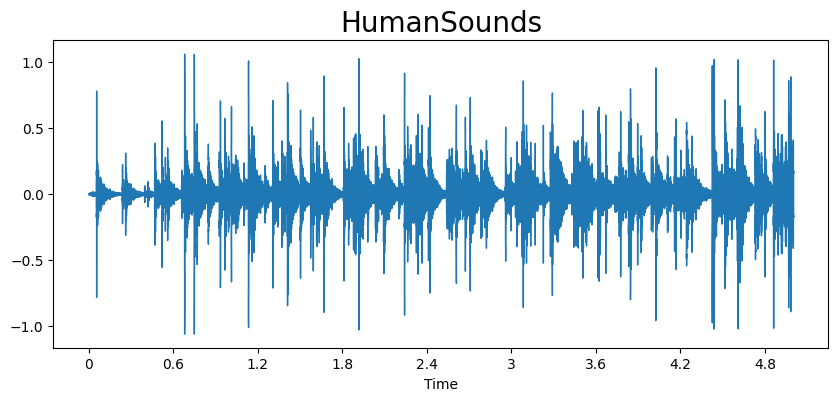

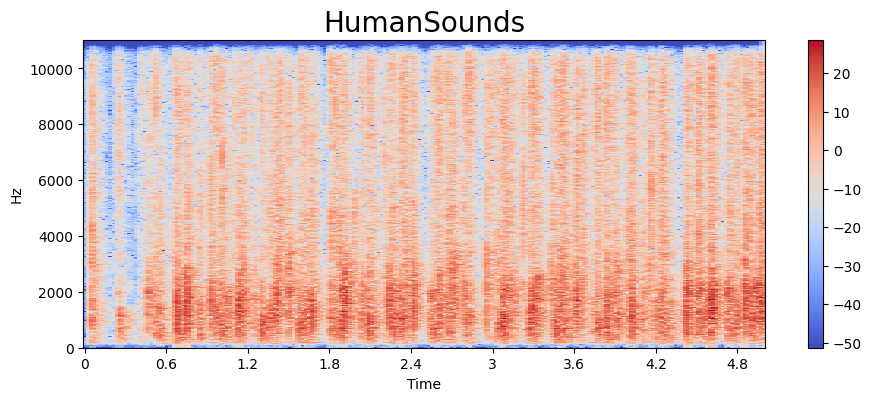

In [30]:
emotion = 'HumanSounds'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [31]:
def find_maximum_duration(filename):
    y, sr = librosa.load(filename, sr=None)  # Load the audio file without resampling
    non_zero_indices = (y != 0).nonzero()[0]
    if len(non_zero_indices) > 0:
        maximum_duration = (non_zero_indices[-1] + 1) / sr
        return maximum_duration
    else:
        return 0  # If the audio is all zeros, consider the duration as 0

def find_minimum_duration(filename):
    y, sr = librosa.load(filename, sr=None)  # Load the audio file without resampling
    non_zero_indices = (y != 0).nonzero()[0]
    if len(non_zero_indices) > 0:
        minimum_duration = (non_zero_indices[0] + 1) / sr
        return minimum_duration
    else:
        return 0  # If the audio is all zeros, consider the duration as 0



In [32]:
X_mfcc_max = df['speech'].apply(lambda x: find_maximum_duration(x))
X_mfcc_min = df['speech'].apply(lambda x: find_minimum_duration(x))
print(f"Maximum duration where sound is ending: {X_mfcc_max} seconds")
print(f"Maximum duration where sound is ending: {X_mfcc_min} seconds")

Maximum duration where sound is ending: 0       2.587732
1       5.000000
2       5.000000
3       5.000000
4       5.000000
          ...   
1995    5.000000
1996    5.000000
1997    3.847846
1998    5.000000
1999    4.852902
Name: speech, Length: 2000, dtype: float64 seconds
Maximum duration where sound is ending: 0       2.228095
1       0.000023
2       0.000023
3       0.000023
4       0.000023
          ...   
1995    0.000023
1996    0.000023
1997    0.000023
1998    0.000023
1999    0.000023
Name: speech, Length: 2000, dtype: float64 seconds


In [33]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=5, offset=0.000023)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [34]:
df['speech'][0]

'Environmental Sound Classification 50/audio\\audio\\1-100032-A-0.wav'

In [35]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [36]:
X_mfcc

0       [-600.9506, 4.694488, -8.50591, -4.276708, -0....
1       [-193.98187, 2.7442915, -59.39108, 4.4119415, ...
2       [16.257185, 56.924335, -8.966379, 15.12665, -1...
3       [17.76905, 54.86635, -7.1865563, 13.657768, -9...
4       [-423.0761, 124.930595, 38.760418, 35.04137, -...
                              ...                        
1995    [-209.6642, 123.89144, -53.748775, 3.0823584, ...
1996    [-51.10361, 26.482595, -5.7138715, -2.9035585,...
1997    [-288.21695, 83.286835, 9.318831, 19.63889, 6....
1998    [-146.4094, 92.56864, -35.27446, 9.842426, 9.8...
1999    [-491.01367, 5.2351146, -30.011185, 8.477816, ...
Name: speech, Length: 2000, dtype: object

In [37]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2000, 40)

In [38]:
X = np.expand_dims(X, -1)
X.shape

(2000, 40, 1)

In [39]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [40]:
y = y.toarray()
y.shape

(2000, 5)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape

model = Sequential()

model.add(Reshape(target_shape=(40, 44), input_shape=(40, 44)))

model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 40, 44)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               308224    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1600, 40, 1) (400, 40, 1) (1600, 5) (400, 5)


In [44]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=75, batch_size=32)

Epoch 1/75
40/40 [==============================] - 7s 109ms/step - loss: 1.6091 - accuracy: 0.2305 - val_loss: 1.5950 - val_accuracy: 0.2188
Epoch 2/75
40/40 [==============================] - 3s 87ms/step - loss: 1.5812 - accuracy: 0.2977 - val_loss: 1.5710 - val_accuracy: 0.3031
Epoch 3/75
40/40 [==============================] - 4s 102ms/step - loss: 1.5625 - accuracy: 0.2844 - val_loss: 1.5660 - val_accuracy: 0.3094
Epoch 4/75
40/40 [==============================] - 4s 97ms/step - loss: 1.5514 - accuracy: 0.2836 - val_loss: 1.5534 - val_accuracy: 0.2688
Epoch 5/75
40/40 [==============================] - 5s 115ms/step - loss: 1.5223 - accuracy: 0.2898 - val_loss: 1.5525 - val_accuracy: 0.2844
Epoch 6/75
40/40 [==============================] - 4s 91ms/step - loss: 1.5014 - accuracy: 0.3141 - val_loss: 1.5389 - val_accuracy: 0.3031
Epoch 7/75
40/40 [==============================] - 5s 116ms/step - loss: 1.4750 - accuracy: 0.3391 - val_loss: 1.5286 - val_accuracy: 0.3344
Epoch 8/7

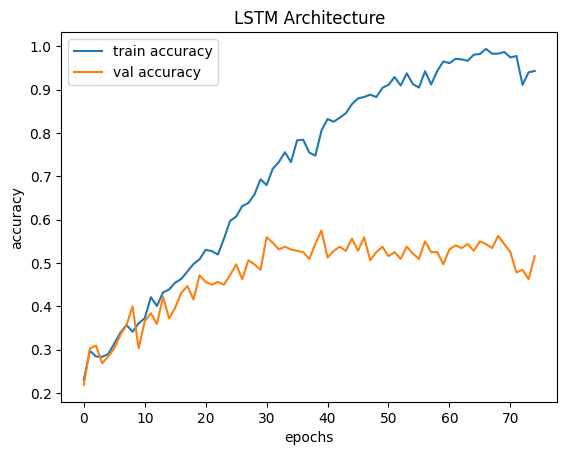

In [45]:
epochs = list(range(75))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.title(label='LSTM Architecture', loc='center')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(X_test), axis=-1)

13/13 [==============================] - 1s 19ms/step


In [47]:
y_pred

array([1, 2, 1, 3, 3, 3, 1, 2, 2, 0, 1, 1, 0, 0, 3, 4, 1, 4, 0, 0, 3, 1,
       3, 2, 3, 0, 0, 2, 0, 1, 0, 2, 3, 3, 2, 2, 2, 3, 4, 3, 1, 3, 1, 1,
       3, 3, 0, 2, 0, 0, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 2, 1, 0, 3, 0, 4,
       0, 2, 0, 2, 0, 4, 2, 2, 2, 3, 4, 4, 3, 0, 0, 2, 2, 1, 4, 2, 3, 0,
       1, 0, 1, 2, 0, 0, 3, 2, 0, 4, 0, 3, 4, 1, 1, 0, 2, 1, 4, 1, 4, 4,
       2, 3, 4, 0, 0, 0, 0, 2, 2, 3, 3, 1, 4, 0, 3, 3, 1, 3, 4, 3, 3, 3,
       1, 0, 2, 0, 4, 1, 0, 2, 3, 4, 1, 0, 1, 3, 4, 2, 1, 3, 2, 2, 2, 0,
       3, 4, 3, 1, 3, 1, 2, 0, 2, 1, 1, 3, 3, 3, 4, 1, 2, 1, 1, 0, 3, 0,
       1, 3, 2, 3, 2, 0, 4, 4, 0, 2, 2, 1, 0, 4, 1, 1, 2, 3, 2, 4, 0, 3,
       0, 2, 3, 2, 3, 2, 3, 1, 4, 1, 2, 2, 3, 2, 1, 1, 0, 0, 3, 3, 2, 0,
       2, 4, 3, 1, 0, 3, 1, 0, 2, 3, 0, 0, 3, 3, 4, 0, 1, 0, 2, 3, 1, 0,
       1, 4, 3, 1, 2, 0, 3, 1, 3, 2, 2, 0, 3, 1, 3, 4, 0, 0, 0, 0, 4, 2,
       4, 4, 3, 4, 3, 1, 3, 2, 0, 4, 4, 1, 2, 4, 1, 1, 0, 0, 4, 4, 1, 3,
       3, 0, 1, 2, 0, 1, 3, 1, 0, 4, 2, 3, 1, 3, 3,

In [48]:
y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [49]:
y_pred_one_hot = np.eye(y_test.shape[1])[y_pred]

y_pred_one_hot


array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_one_hot, average='macro')
recall = recall_score(y_test, y_pred_one_hot, average='macro')
f1 = f1_score(y_test, y_pred_one_hot, average='macro')
accuracy = accuracy_score(y_test, y_pred_one_hot)

print(f'LSTM Precision: {precision:.4f}')
print(f'LSTM Recall: {recall:.4f}')
print(f'LSTM F1 Score: {f1:.4f}')
print(f'LSTM Accuracy: {accuracy:.4f}')

LSTM Precision: 0.4712
LSTM Recall: 0.4700
LSTM F1 Score: 0.4683
LSTM Accuracy: 0.4725


In [51]:
import os
paths = []
for dirname, _, filenames in os.walk('Judge/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

df_judge = pd.DataFrame()
df_judge['speech'] = paths
df_judge.head()

,speech
0,Judge/54321-35890.mp3
1,Judge/mixkit-angry-and-agitated-dog-growling-5...
2,Judge/mixkit-busy-park-playground-with-kids-pl...
3,Judge/mixkit-cartoon-creature-pain-scream-101.wav
4,Judge/mixkit-dog-barking-twice-1.wav


In [52]:
X_mfcc_judge = df_judge['speech'].apply(lambda x: extract_mfcc(x))
X_judge = [x for x in X_mfcc_judge]
X_judge = np.array(X_judge)

X_judge = np.expand_dims(X_judge, -1)

In [53]:
j_pred = np.argmax(model.predict(X_judge), axis=-1)

1/1 [==============================] - 0s 65ms/step


In [54]:
j_pred

array([3, 0, 3, 3, 0, 2], dtype=int64)

In [55]:
for i in j_pred:
    if (i == 0):
        print("Animals")
    elif (i==1):
        print("NaturalSoundScapes")
    elif (i == 2):
        print("HumanSounds")
    elif (i == 3):
        print("InteriorSounds")
    else:
        print("ExteriorSounds")


InteriorSounds
Animals
InteriorSounds
InteriorSounds
Animals
HumanSounds


CNN


In [56]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Reshape

model = Sequential()
model.add(Reshape(target_shape=(40, 1), input_shape=(40, 1)))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 40, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)           

In [57]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1600, 40, 1) (400, 40, 1) (1600, 5) (400, 5)


In [58]:
cnn_history = model.fit(X_train, y_train, validation_split=0.2, epochs=75, batch_size=32)

Epoch 1/75
40/40 [==============================] - 2s 11ms/step - loss: 1.6589 - accuracy: 0.2953 - val_loss: 1.4244 - val_accuracy: 0.3562
Epoch 2/75
40/40 [==============================] - 0s 6ms/step - loss: 1.4499 - accuracy: 0.3734 - val_loss: 1.3685 - val_accuracy: 0.3938
Epoch 3/75
40/40 [==============================] - 0s 7ms/step - loss: 1.3714 - accuracy: 0.4211 - val_loss: 1.3162 - val_accuracy: 0.4125
Epoch 4/75
40/40 [==============================] - 0s 7ms/step - loss: 1.3047 - accuracy: 0.4437 - val_loss: 1.2823 - val_accuracy: 0.4625
Epoch 5/75
40/40 [==============================] - 0s 8ms/step - loss: 1.2512 - accuracy: 0.4750 - val_loss: 1.2468 - val_accuracy: 0.4750
Epoch 6/75
40/40 [==============================] - 0s 9ms/step - loss: 1.2302 - accuracy: 0.5039 - val_loss: 1.2510 - val_accuracy: 0.4719
Epoch 7/75
40/40 [==============================] - 0s 8ms/step - loss: 1.1832 - accuracy: 0.5117 - val_loss: 1.2455 - val_accuracy: 0.4812
Epoch 8/75
40/40 [=

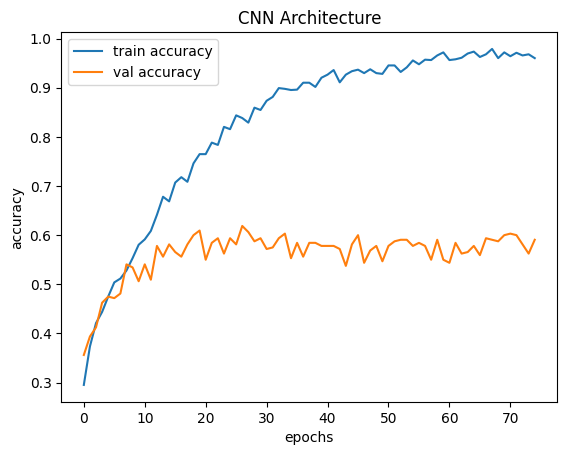

In [59]:
epochs = list(range(75))
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.title(label='CNN Architecture', loc='center')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [60]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred_one_hot = np.eye(y_test.shape[1])[y_pred]
accuracy = np.mean(np.all(y_test == y_pred_one_hot, axis=1))
print("Accuracy:", accuracy)

13/13 [==============================] - 0s 3ms/step
Accuracy: 0.555


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_one_hot, average='weighted')
recall = recall_score(y_test, y_pred_one_hot, average='weighted')
f1 = f1_score(y_test, y_pred_one_hot, average='weighted')
accuracy = accuracy_score(y_test, y_pred_one_hot)

print(f'CNN Precision: {precision:.4f}')
print(f'CNN Recall: {recall:.4f}')
print(f'CNN F1 Score: {f1:.4f}')
print(f'CNN Accuracy: {accuracy:.4f}')

CNN Precision: 0.5640
CNN Recall: 0.5550
CNN F1 Score: 0.5551
CNN Accuracy: 0.5550


In [62]:
j_pred = np.argmax(model.predict(X_judge), axis=-1)

for i in j_pred:
    if (i == 0):
        print("Animals")
    elif (i==1):
        print("NaturalSoundScapes")
    elif (i == 2):
        print("HumanSounds")
    elif (i == 3):
        print("InteriorSounds")
    else:
        print("ExteriorSounds")

1/1 [==============================] - 0s 24ms/step
HumanSounds
InteriorSounds
NaturalSoundScapes
HumanSounds
HumanSounds
Animals


SVM


In [63]:
from sklearn import svm
model = svm.SVC(kernel='linear')

In [64]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
import numpy as np

y_train_int = np.argmax(y_train, axis=1)

In [65]:
y_train_int.shape, y_train.shape

((1600,), (1600, 5))

In [66]:
X_train, X_val, y_train_int, y_val_int = train_test_split(X_train, y_train_int, test_size=0.2, random_state=42)

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)

svm_acc = model.fit(X_train_flattened, y_train_int)

y_val_pred = model.predict(X_val_flattened)

val_accuracy = accuracy_score(y_val_int, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')


Validation Accuracy: 0.46875


In [67]:
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
y_pred = model.predict(X_test_flattened)

In [68]:
y_pred

array([2, 3, 4, 2, 3, 3, 3, 2, 4, 4, 4, 2, 3, 1, 3, 4, 0, 1, 1, 1, 4, 2,
       3, 3, 3, 1, 1, 0, 2, 0, 0, 3, 1, 4, 3, 4, 2, 4, 0, 3, 1, 4, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 1, 3, 1, 1, 1, 1, 4, 1, 3, 0, 0, 0, 3, 0, 0,
       0, 3, 1, 3, 1, 4, 3, 4, 3, 3, 1, 1, 3, 1, 0, 2, 3, 1, 4, 0, 3, 0,
       4, 3, 1, 2, 1, 0, 2, 1, 0, 2, 4, 2, 4, 1, 1, 1, 2, 0, 4, 0, 4, 3,
       1, 4, 4, 1, 4, 3, 0, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3,
       0, 3, 2, 1, 1, 2, 2, 2, 1, 0, 1, 3, 1, 3, 4, 3, 0, 1, 0, 3, 0, 0,
       1, 0, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 3, 0, 1, 2, 4, 3,
       1, 3, 0, 1, 3, 2, 2, 1, 0, 4, 4, 1, 0, 1, 1, 1, 3, 4, 2, 1, 0, 3,
       0, 1, 1, 4, 3, 1, 2, 0, 0, 1, 1, 2, 3, 3, 0, 3, 0, 0, 3, 4, 3, 0,
       2, 4, 3, 1, 3, 3, 0, 1, 4, 3, 0, 4, 4, 0, 1, 1, 1, 2, 1, 3, 0, 0,
       2, 4, 4, 1, 2, 0, 1, 1, 1, 3, 2, 0, 3, 0, 4, 0, 1, 1, 2, 0, 3, 2,
       3, 4, 4, 0, 3, 1, 2, 3, 1, 1, 0, 4, 4, 1, 2, 4, 4, 1, 1, 4, 1, 1,
       1, 0, 1, 3, 2, 0, 3, 0, 1, 4, 3, 4, 4, 0, 3,

In [69]:
y_pred_one_hot = np.eye(y_test.shape[1])[y_pred]

In [70]:
y_pred_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [71]:
accuracy = np.mean(np.all(y_test == y_pred_one_hot, axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.425


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_one_hot, average='weighted')
recall = recall_score(y_test, y_pred_one_hot, average='weighted')
f1 = f1_score(y_test, y_pred_one_hot, average='weighted')
accuracy = accuracy_score(y_test, y_pred_one_hot)

print(f'SVM Precision: {precision:.4f}')
print(f'SVM Recall: {recall:.4f}')
print(f'SVM F1 Score: {f1:.4f}')
print(f'SVM Accuracy: {accuracy:.4f}')

SVM Precision: 0.4359
SVM Recall: 0.4250
SVM F1 Score: 0.4225
SVM Accuracy: 0.4250


In [73]:

X_judge_flattened = X_judge.reshape(X_judge.shape[0], -1)
j_pred = model.predict(X_judge_flattened)

for i in j_pred:
    if (i == 0):
        print("Animals")
    elif (i==1):
        print("NaturalSoundScapes")
    elif (i == 2):
        print("HumanSounds")
    elif (i == 3):
        print("InteriorSounds")
    else:
        print("ExteriorSounds")

InteriorSounds
NaturalSoundScapes
Animals
InteriorSounds
HumanSounds
Animals


In [74]:
y, X.shape

(array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]]),
 (2000, 40, 1))

In [75]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

X_expanded = np.expand_dims(X, axis=-1)
print(X_expanded.shape)
X_expanded = np.repeat(X_expanded, 3, axis=-1)

(2000, 40, 1, 1)


In [76]:
X_expanded.shape

(2000, 40, 1, 3)

In [77]:
from scipy.ndimage import zoom
from skimage.transform import resize

resized_X = zoom(X_expanded, (1, 1.6, 1, 1), order=1)
resized_X.shape  # (2000, 64, 1, 3)

resized_X = resized_X.squeeze(axis=2) 
resized_X = np.array([resize(x, (32, 32, 3)) for x in resized_X])
resized_X.shape

(2000, 32, 32, 3)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(resized_X, y, test_size=0.2, random_state=42)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [79]:
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 14847301 (56.64 MB)
Trainable params: 132613 (518.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_______

In [81]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
40/40 [==============================] - 7s 148ms/step - loss: 5.9033 - accuracy: 0.2656 - val_loss: 1.9067 - val_accuracy: 0.3812
Epoch 2/20
40/40 [==============================] - 6s 142ms/step - loss: 2.3945 - accuracy: 0.3352 - val_loss: 1.3804 - val_accuracy: 0.4156
Epoch 3/20
40/40 [==============================] - 6s 139ms/step - loss: 1.5743 - accuracy: 0.3641 - val_loss: 1.3467 - val_accuracy: 0.4125
Epoch 4/20
40/40 [==============================] - 6s 150ms/step - loss: 1.4079 - accuracy: 0.4133 - val_loss: 1.3281 - val_accuracy: 0.4313
Epoch 5/20
40/40 [==============================] - 6s 149ms/step - loss: 1.3674 - accuracy: 0.4289 - val_loss: 1.3215 - val_accuracy: 0.4375
Epoch 6/20
40/40 [==============================] - 6s 145ms/step - loss: 1.3449 - accuracy: 0.4273 - val_loss: 1.3102 - val_accuracy: 0.4250
Epoch 7/20
40/40 [==============================] - 6s 141ms/step - loss: 1.3139 - accuracy: 0.4250 - val_loss: 1.3205 - val_accuracy: 0.4250
Epoch 

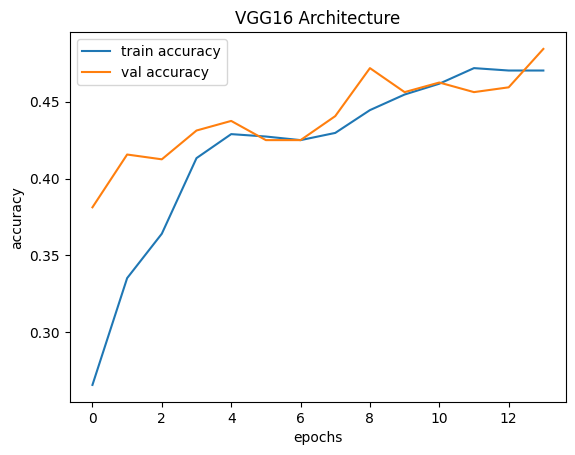

In [83]:
epochs = list(range(14))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.title(label='VGG16 Architecture', loc='center')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(X_test), axis=-1)

13/13 [==============================] - 1s 96ms/step


In [85]:
y_pred_one_hot = np.eye(y_test.shape[1])[y_pred]
y_pred_one_hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred_one_hot, average='macro')
recall = recall_score(y_test, y_pred_one_hot, average='macro')
f1 = f1_score(y_test, y_pred_one_hot, average='macro')
accuracy = accuracy_score(y_test, y_pred_one_hot)

print(f'VGG16 Precision: {precision:.4f}')
print(f'VGG16 Recall: {recall:.4f}')
print(f'VGG16 F1 Score: {f1:.4f}')
print(f'VGG16 Accuracy: {accuracy:.4f}')

VGG16 Precision: 0.4515
VGG16 Recall: 0.4619
VGG16 F1 Score: 0.4502
VGG16 Accuracy: 0.4575


In [87]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")

13/13 [==============================] - 2s 121ms/step - loss: 1.3141 - accuracy: 0.4575
Test Accuracy: 0.45750001072883606
